In [19]:
import csv
import time
import numpy as np
import pyvisa as visa
import tkinter as tk
from tkinter import filedialog
from tkinter import filedialog
import csv
import matplotlib.pyplot as plt

In [8]:
oscilloscope_address = 'TCPIP0::192.168.1.36::inst0::INSTR'
rm = visa.ResourceManager()
print(rm.list_resources())
oscilloscope = rm.open_resource(oscilloscope_address)
print(oscilloscope.query('*IDN?'))
oscilloscope.chunk_size = 1024 * 1024  # Set a larger chunk size (adjust as needed)

('ASRL1::INSTR', 'ASRL3::INSTR', 'ASRL4::INSTR', 'ASRL5::INSTR')
KEYSIGHT TECHNOLOGIES,HD304MSO,MY64280181,10.05.2024100325



In [11]:
# Dedault oscilloscope keysight
sampling_time = 0.1#s
memory_depth = "1000000"
oscilloscope_address = 'TCPIP0::192.168.1.36::inst0::INSTR'
rm = visa.ResourceManager()
oscilloscope = rm.open_resource(oscilloscope_address)
print(oscilloscope.query('*IDN?'))
oscilloscope.chunk_size = 1024 * 1024
time.sleep(1)
oscilloscope.write(f':ACQuire:DIGitizer 1')
print(oscilloscope.query(':ACQuire:DIGitizer?'))
oscilloscope.write(f':ACQ:POINts {memory_depth}')
memory_depth1= int(float(oscilloscope.query(':ACQuire:POINts?')))
print(f'Memory depth: {memory_depth1}')
sampling_rate1 = memory_depth1/sampling_time
print(f'Sampling rate set: {sampling_rate1/1000} kHz')
oscilloscope.write(f':ACQuire:SRATe {sampling_rate1}')#sampling_rate
time.sleep(1)
oscilloscope.write(f':TIMebase:MAIN:SCALe {sampling_time/10}')
oscilloscope.write(f':TIMebase:MAIN:POSition {sampling_time/2}')
# oscilloscope.write(':SINGle')
oscilloscope.write(':DIGitize')

# oscilloscope.close()

sampling_rate = int(float(oscilloscope.query(':ACQuire:SRATe:ANALog?')))
print(f'Sampling rate: {sampling_rate/1000} kHz')

KEYSIGHT TECHNOLOGIES,HD304MSO,MY64280181,10.05.2024100325

1

Memory depth: 1000000
Sampling rate set: 10000.0 kHz
Sampling rate: 10000.0 kHz


In [25]:
 # Set up the oscilloscope
memory_depth='1000000'
oscilloscope.write(f':ACQ:POINts {memory_depth}')  # Set the memory depth
time.sleep(1)
# oscilloscope.write('channel1:PROBe 10')# probe attenuation set to 10
# oscilloscope.write('channel1:range 16')#Vertical 
print(oscilloscope.query('channel1:range?'))#Vertical
yrange = oscilloscope.query('channel1:range?')
# oscilloscope.write('channel1:offset 1.00')#center of screen 
# oscilloscope.write('timebase:mode main')#
# oscilloscope.write('timebase:range 1')# time base at x full-scale 
# oscilloscope.write('timebase:delay 0')#
# oscilloscope.write('acquire:type average') #<type> ::= {NORMal | AVERage | PEAK}
# oscilloscope.write('acquire:complete 100')
# oscilloscope.write('acquire:count 8')
# oscilloscope.write('digitize:channel1')
# oscilloscope.write('waveform:source channel1')
# print(oscilloscope.write('waveform:format byte'))
# oscilloscope.write(':WAV:FORM ASCii')  # Set waveform format to {WORD|BYTE|ASCii}
oscilloscope.write('waveform:format word')
oscilloscope.write('waveform:points:mode raw')
print(oscilloscope.query(':WAVeform:FORMat?'))

+1.60E+00

WORD



In [29]:
print(oscilloscope.query(':TIMebase:MAIN:POSition?'))

+5.000000000000E+00



In [12]:
oscilloscope.timeout = 30000

In [13]:
channels=1
time_colume=True
file_name=None
preamble = oscilloscope.query(':WAV:PRE?').split(',')
print(preamble)
num_samples = int(preamble[2])
time_per_sample = float(preamble[4])
x_origin = float(preamble[5])
if time_colume:
        time_array = np.array([x_origin + i * time_per_sample for i in range(num_samples)])
        waveform_data = [time_array]
else:
        waveform_data = []

['+0', '+0', '+62500', '+1', '+1.60000000E-06', '-1.90074193E-18', '+0', '+1.25000002E-02', '+4.93699998E-01', '+128\n']


In [14]:
oscilloscope.timeout = 30000

In [15]:
print(oscilloscope.write(':WAV:SOUR CHAN1'))
print(oscilloscope.query(':WAV:SOUR?'))
print(oscilloscope.query(':WAVeform:UNSigned?'))
oscilloscope.write(':WAVeform:BYTeorder LSBFirst')
print(oscilloscope.query(':WAVeform:BYTeorder?'))
print(oscilloscope.query(':WAVeform:FORMat?'))

# print(oscilloscope.query(':WAV:DATA?'))
# result = oscilloscope.query_binary_values('WAV:DATA?', datatype='s', container=bytes)
# 1225
# oscilloscope.query_binary_values(':WAV:DATA?', datatype='B', container=np.array)
# waveform_raw = oscilloscope.query_binary_values(':WAV:DATA?', datatype='B', container=np.array)

17
CHAN1

1

LSBF

BYTE



In [18]:
# Retrieve waveform data from each channel
# for channel in channels:
channel1=1
print(f"Getting data from Channel {channel1}...")
oscilloscope.write(f':WAV:SOUR CHAN{channel1}')  # Set source of the waveform
waveform_raw = oscilloscope.query_binary_values(':waveform:data?', datatype='H', container=np.array)  # Retrieve binary waveform data
# waveform_raw = oscilloscope.query_binary_values(':waveform:data?', container=np.array) 
preamble = oscilloscope.query(':WAV:PRE?').split(',')
volt_scale = float(preamble[7])
volt_offset = float(preamble[8])
y_reference = float(preamble[9])
# Yi = oscilloscope.query(':WAVeform:YINCrement?')
# print(f"Yi: {Yi}")
# yscale = volt_scale/4
# print(f"Ys: {yscale}")
# ys = float(yrange)/(y_reference- 0.5)/2
# print(f"Ys: {ys}")
print(f"Voltage scale: {volt_scale}")
print(f"Voltage offset: {volt_offset}") 
print(f"Y reference: {y_reference}")
# waveform_voltage = (waveform_raw.astype(float) - y_reference) * ys + volt_offset
waveform_voltage = (waveform_raw.astype(float) - y_reference) * volt_scale + volt_offset
# waveform_voltage = waveform_raw.astype(float)
waveform_data.append(waveform_voltage)

Getting data from Channel 1...
Voltage scale: 0.0125000002
Voltage offset: 0.493699998
Y reference: 128.0


Sampling rate: 10000.0 kHz


ValueError: x and y must have same first dimension, but have shapes (62500,) and (31250,)

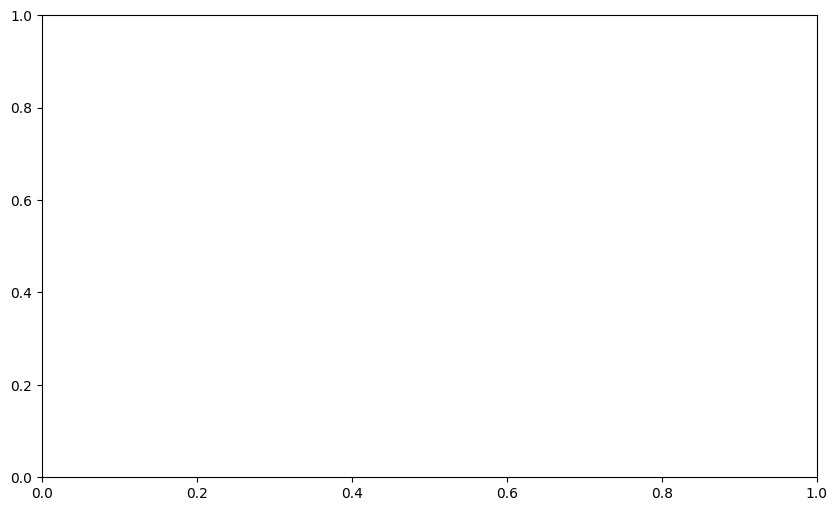

In [20]:
# Plot
print(f'Sampling rate: {sampling_rate/1000} kHz')
yrange = 60
yref = -70
plt.figure(figsize=(10, 6))
plt.plot(time_array, waveform_voltage, label='rigol1')
plt.title('Power Spectral Estimation')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (dBm)')
plt.xlim(0,500)
plt.ylim(yref-yrange/2, yref+yrange/2)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
if file_name:
        # Save the screenshot
        print('Saving screenshot...')
        oscilloscope.write(':SAVE:IMAGe:FORM BMP')
        save_path = f'D:\\{file_name}.bmp' 
        oscilloscope.write(f':SAVE:IMAGe {save_path}')
        print(f'Screenshot saved to {save_path}')
        # oscilloscope.write(f':SAVE:IMAGe D:\{file_name}.tiff')
        # choose a folder to save the data
        root = tk.Tk()
        root.withdraw()  # hide the root window
        folder_path = filedialog.askdirectory()
        # Save waveform data to a CSV file
        print('Writing CSV...')
        BUFFER_SIZE = 1000000  # Adjust the buffer size as needed
        with open(f'{folder_path}/{file_name}_.csv', 'w', newline='') as csvfile:
            writer = csv.writer(csvfile)
            if time_colume:
                writer.writerow(['Time'] + [f'Channel {channel}' for channel in channels])  # Write header
            else:
                writer.writerow([f'Channel {channel}' for channel in channels])
            for row in zip(*waveform_data):  # Transpose and write
                writer.writerow(row)
        print('CSV writing Done')




    # Disconnect from the oscilloscope
    # oscilloscope.write(':RUN')
    # oscilloscope.close()
print('OSC operation Done\n')


In [ ]:
if __name__ == '__main__':
    oscilloscope_address = 'TCPIP0::192.168.1.36::inst0::INSTR'
    rm = visa.ResourceManager()
    print(rm.list_resources())
    oscilloscope = rm.open_resource(oscilloscope_address)
    print(oscilloscope.query('*IDN?'))  # Query the identification string of the oscilloscope
    oscilloscope.write(':CHANnel1:COUPling DC')
    # print(oscilloscope.query(':SOURce1:FUNCtion:SHApe?'))
    oscilloscope.write(':CHANnel1:OFFSet 0.5')

In [ ]:
import os
import numpy as np
import struct
 
 
def get_depth_img(file_path):
    """
    获取深度图中心10*10平均距离
    :param file_path: 深度图目录
    :return: 深度距离
    """
    file_long = os.path.getsize(file_path)  # 获取文件中二进制字符长度
    with open(file_path, "rb") as f:
        data = []
        width = bin2int(f.read(2))[0]  # 获取图片分辨率(宽、高)
        height = bin2int(f.read(2))[0]
 
        for i in range(1, file_long - 4, 2):
            data.append(bin2int(f.read(2)))
 
        data = np.array(data)
        data = data.reshape(width, height)  # 将数据整合为二维数组格式
 
        h1 = int(((width - 10) / 2) - 1)
        h2 = int(h1 + 10)
        w1 = int(((height - 10) / 2) - 1)
        w2 = int(w1 + 10)
        data = data[h1: h2, w1: w2]  # 获取图片中心10*10数据
        mean_data = np.mean(data)  # 将中心数据取平均
        return mean_data
 
 
def bin2int(bin_data):
    """
    将二进制字符转换为int字符
    :param bin_data: 二进制字符
    :return:int字符
    """
    int_data = struct.unpack('H', bin_data)
    return int_data
 
 
if __name__ == '__main__':
    mean_depth = get_depth_img("G:\PYTHON1\\bin\\abc.bin")
    print(mean_depth)